# CICERO SCM - model reading of input datafiles

Import some stuff

In [1]:
import sys
import re
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import pandas.testing as pdt
import warnings
try:
    from pandas.core.common import SettingWithCopyWarning
except:
    from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

Import the model

In [2]:
sys.path.insert(0,os.path.join(os.getcwd(), '../', 'src'))

from ciceroscm import CICEROSCM

set up input directories

In [3]:
test_data_dir = os.path.join(os.getcwd(), '../', 'tests', 'test-data')

Run the model

In [4]:
# NBVAL_IGNORE_OUTPUT
scen = 'test'
cscm=CICEROSCM({
            "gaspam_file": os.path.join(test_data_dir, "gases_v1RCMIP.txt"),
            "emstart": 1850,   
            "nystart": 1750,
            "nyend": 2100,
            "concentrations_file": os.path.join(test_data_dir, "ssp245_conc_RCMIP.txt"),
            "emissions_file": os.path.join(test_data_dir, "ssp245_em_RCMIP.txt"),
            "nat_ch4_file": os.path.join(test_data_dir, "natemis_ch4.txt"),
            "nat_n2o_file": os.path.join(test_data_dir, "natemis_n2o.txt"),
            "idtm":24,
        })

In [5]:
# NBVAL_IGNORE_OUTPUT

cscm._run({
            "results_as_dict":True
        },
    pamset_udm={"threstemp": 7.0, #scales vertical velocity as a function of mixed layer temperature
                    "rlamdo":16.0,#air-sea heat exchange coefficient (wm^-2K^-1)
                    "akapa":0.634, #vertical heat diffusivity
                    "cpi":0.4, #temperature change ratio: polar to nonpolar region
                    "W":4, #vertical velocity (m/yr)
                    "beto":3.5, #ocean interhemispheric heat exchange coeff (Wm^-2K^-1)
                    "lambda":0.54,
                    "mixed":60.0,  #mixed layer depth
                    "foan":0.61, #fraction of northern hemisphere covered by ocean
                    "foas":0.81, #fraction of northern hemisphere covered by ocean
                    "ebbeta":0.0,#atmospheric interhemispheric heat exchange 
                    "fnso":0.7531, #ocean area ratio, northern to southern hemisphere
                    "lm":40, #number of vertical layers
                    "ldtime":12,
                   },
    pamset_emiconc={"lamb": 0.8,
                    "qbmb":0.03,
                    "qo3":0.4,
                    "qdirso2":-.457,
                    "qindso2":-.514,
                    "qbc":.2,
                    "qh2o_ch4":.171,
                    "qoc":-.103,
                    "ref_yr":2010,
                    "idtm":24},
    )

# Read model output into Pandas dataframes

What output do we have?

In [6]:
cscm.results.keys()

dict_keys(['OHC700', 'OHCTOT', 'RIB_glob', 'RIB_N', 'RIB_S', 'dT_glob', 'dT_NH', 'dT_SH', 'dT_glob_air', 'dT_NH_air', 'dT_SH_air', 'dT_glob_sea', 'dT_NH_sea', 'dT_SHsea', 'Total_forcing', 'Solar_forcing', 'Volcanic_forcing_NH', 'Volcanic_forcing_SH', 'emissions', 'concentrations', 'forcing'])

Convert the results into a dataframe

In [7]:
def to_df(cscm):
    out=pd.concat([pd.DataFrame(v) for k, v in cscm.results.items()], axis = 1, keys = list(cscm.results.keys()))
    return out

In [8]:

df_temp = to_df(cscm)


In [9]:
# NBVAL_IGNORE_OUTPUT
df_temp.head()

OHC700    OHCTOT  RIB_glob     RIB_N     RIB_S   dT_glob     dT_NH  \
          0         0         0         0         0         0         0   
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1 -0.001058 -0.001065 -0.001474 -0.002624 -0.000325 -0.000069 -0.000123   
2 -0.002961 -0.003007 -0.001508 -0.003301  0.000286 -0.000239 -0.000417   
3 -0.003143 -0.003242  0.000931 -0.000257  0.002120 -0.000266 -0.000489   
4  0.000735  0.000630  0.004672  0.004777  0.004568  0.000050 -0.000060   

      dT_SH dT_glob_air dT_NH_air  ...  forcing                         \
          0           0         0  ... STRAT_O3 STRAT_H2O BMB_AEROS_BC   
0  0.000000    0.000000  0.000000  ...      NaN       NaN          NaN   
1 -0.000015   -0.000110 -0.000197  ...      NaN       NaN          NaN   
2 -0.000061   -0.000314 -0.000571  ...      NaN       NaN          NaN   
3 -0.000043   -0.000275 -0.000578  ...      NaN       NaN          NaN   
4  0.000159    0.000201  0.000058  ...      NaN       NaN          NaN   

                                                              
  BMB_AEROS_OC BMB_AEROS LANDUSE  BC  OC OTHER Total_forcing  
0          NaN       NaN     NaN NaN NaN   NaN           NaN  
1          NaN       NaN     NaN NaN NaN   NaN           NaN  
2          NaN       NaN     NaN NaN NaN   NaN           NaN  
3          NaN       NaN     NaN NaN NaN   NaN           NaN  
4          NaN       NaN     NaN NaN NaN   NaN           NaN  

[5 rows x 153 columns]

Plot some example fields

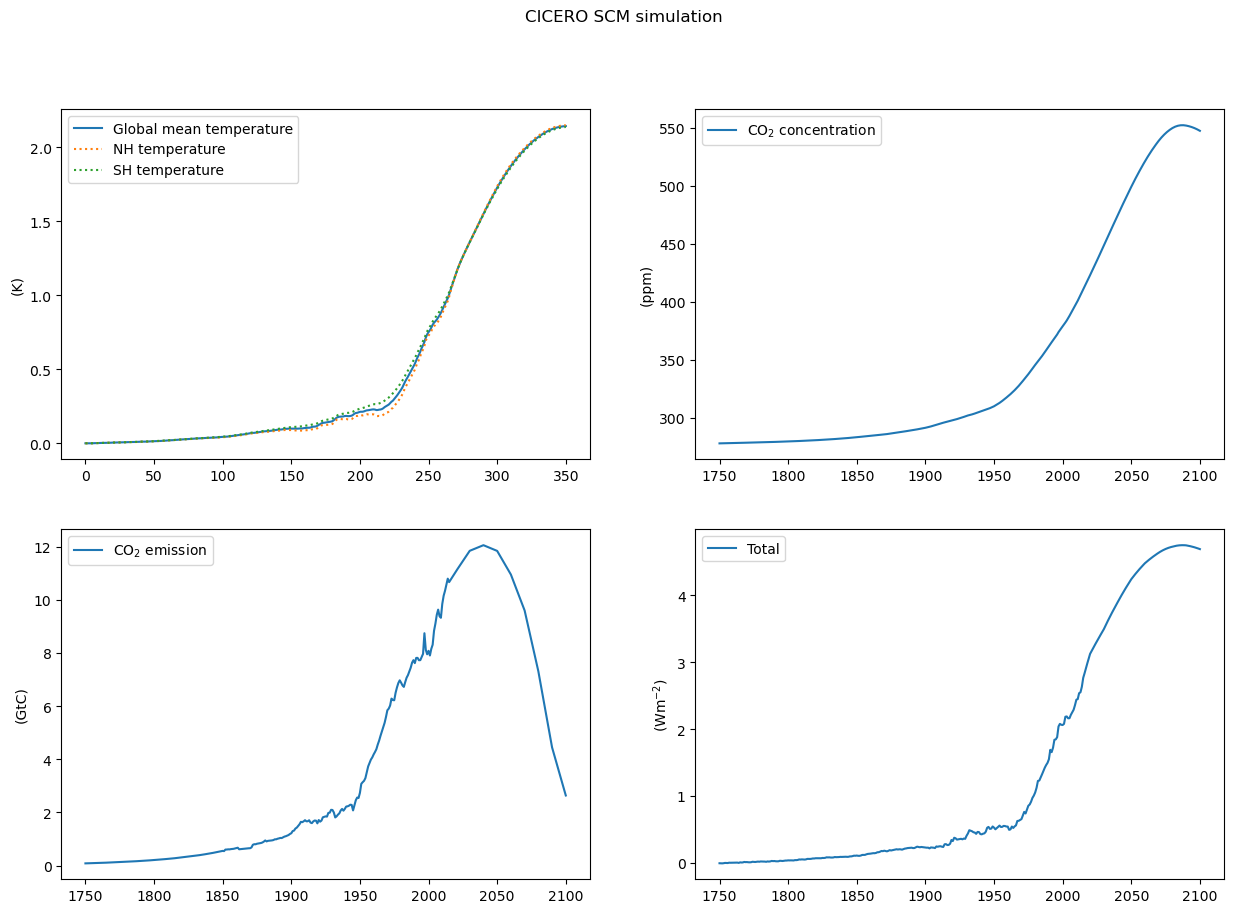

In [10]:
# NBVAL_IGNORE_OUTPUT
fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
axs=axs.flatten()
fig.suptitle('CICERO SCM simulation')

df_temp['dT_glob'].plot(ylabel='(K)',ax=axs[0])
df_temp['dT_NH'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
df_temp['dT_SH'].plot(ylabel='(K)',ax=axs[0],linestyle=':')
axs[0].legend(['Global mean temperature','NH temperature','SH temperature'])

df_temp['concentrations']['CO2'].plot(ylabel='(ppm)',ax=axs[1])
axs[1].legend([r'CO$_2$ concentration'])

df_temp['emissions']['CO2'].plot(ylabel='(GtC)',ax=axs[2])
axs[2].legend([r'CO$_2$ emission'])

df_temp['forcing']['Total_forcing'].plot(ylabel='(Wm$^{-2}$)',ax=axs[3])

axs[3].legend([r'Total','CO$_2$','CH$_4$','Land Use'])